<a href="https://colab.research.google.com/github/Vladislav118/test_25/blob/main/%D0%A4%D0%B8%D0%BD%D0%B0%D0%BD%D1%81%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import os
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
from google.colab import drive
drive.mount('/content/drive')
print('\n', os.listdir('/content/drive/MyDrive/Colab Notebooks/kursovaya'))
%ll -lF /content/drive/MyDrive/"Colab Notebooks"/swot/
from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())
table = gs.open_by_key('1WSdEexWo7rXI0spj2cQ9E11JM6IgnaajDLL-bYwatqk')
print('\n', table.worksheets())
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
print('\n')

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 ['Новая таблица.gsheet', 'Свот.gsheet', 'Свот.ipynb', 'Финансы.gsheet', 'Финансы.ipynb']
total 13
-rw------- 1 root 12367 Jun  8 16:29 matplot_bar_swot.png
-rw------- 1 root   151 Jun  8 16:28 WhyMusic.gsheet

 [<Worksheet 'Прибыль' id:0>, <Worksheet 'Основные средства' id:944598933>, <Worksheet 'Расходы' id:1766684894>, <Worksheet 'Кредит' id:573904358>, <Worksheet 'Зарплата' id:322997680>]




1 ['Беговые тренажеры', 'руб/шт', '40000', '30']
2 ['Спортивная одежда', 'руб/шт', '3000', '150']
3 ['Спортивное питание', 'руб/шт', '800', '200']
4 ['Товары для велоспорта', 'руб/шт', '70000', '30']
5 ['Самокаты, ролики, скейтборды', 'руб/шт', '15000', '30']
6 ['Теннис, бадминтон', 'руб/шт', '7000', '15']
7 ['Силовые тренажеры', 'руб/шт', '90000', '30']
Планируемые доходы составят: 7165000.0


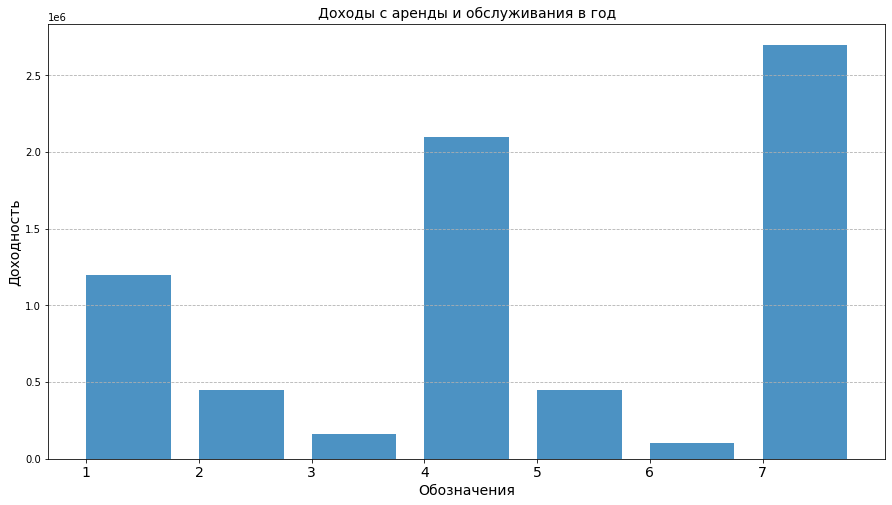

1  -  Беговые тренажеры ; 
2  -  Спортивная одежда ; 
3  -  Спортивное питание ; 
4  -  Товары для велоспорта ; 
5  -  Самокаты, ролики, скейтборды ; 
6  -  Теннис, бадминтон ; 
7  -  Силовые тренажеры ; 


In [ ]:
worksheet = table.worksheet("Прибыль")
rows = worksheet.get_all_values()
#print(rows)
name = list()
price = list()
count = list()
value = list()
i=0
for row in rows:
  if(i>1 and row[2] != ""):
    print (i - 1, row)
    name.append(row[0])
    # price.append(float(row[2]))
    # count.append(int(row[3]))
    value.append(float(row[2])*int(row[3]))
  i+=1
proceeds = sum(value)
print('Планируемые доходы составят:', proceeds)

import matplotlib.pyplot as plt
x_float = list()
title = list()
y_float = list()
count = 1
for i in name:
  title.append(i)
  x_float.append(count)
  y_float.append(float(value[count - 1]))
  count += 1
x_pos = list()
for i in range(x_float.__len__()):
    x_pos.append(i)
fig=plt.figure(figsize=(15,8), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.8)
plt.xticks(x_pos, x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Доходность', fontsize=14)
plt.title('Доходы с аренды и обслуживания в год', fontsize=14)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

for i in range(title.__len__()):
    print(i+1, " - ", title[i], "; ")
    i += 1


Выручка:  7165000.0
Постоянная составляющая зарплаты: 3408000.0
Переменная составляющая зарплаты 859800.0
Зарплата (постоянная + апеременная), в тч НДФЛ:  4267800.0
Страховые взносы 1066950.0
Планируемая зарплата и страховые взносы: 5334750.0


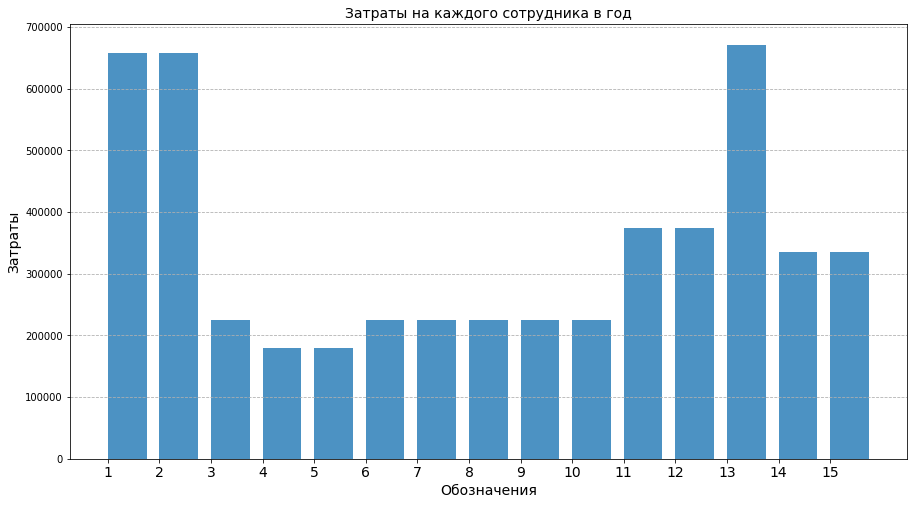

1  -  Продавец в пункт выдачи ; 
2  -  Продавец в пункт выдачи ; 
3  -  Охраник ; 
4  -  Грузчик на складе ; 
5  -  Грузчик на складе ; 
6  -  Водитель ; 
7  -  Водитель ; 
8  -  Пеший курьер ; 
9  -  Пеший курьер ; 
10  -  Пеший курьер ; 
11  -  Бухгалтер ; 
12  -  Секретарь ; 
13  -  Директор ; 
14  -  Офисный консультант ; 
15  -  Офисный консультант ; 


In [ ]:
worksheet = table.worksheet("Зарплата")
rows = worksheet.get_all_values()
name = list()
permanent_salary = list()
percentage_of_revenue = list()
insurance= list()
costs = list()
i = 0
for row in rows:
  if(i>1):
    name.append(row[0])
    permanent_salary.append(float(row[1]))
    percentage_of_revenue.append(float(row[2]))
    insurance.append(float(row[3]))
  i +=1
for i in range (permanent_salary.__len__()):
  costs.append((permanent_salary[i] + (permanent_salary[i] * insurance[i])/100) * 12 + (proceeds * percentage_of_revenue[i])/100)
print('Выручка: ',proceeds)
all_permanent_salary = 12 *sum(permanent_salary)
print('Постоянная составляющая зарплаты:', all_permanent_salary) 
all_variable_salary =  proceeds*(sum(percentage_of_revenue))/100
print('Переменная составляющая зарплаты', all_variable_salary)
all_salary = all_permanent_salary + all_variable_salary 
print('Зарплата (постоянная + апеременная), в тч НДФЛ: ', all_salary)
insurance = insurance[0]*all_salary/100
print('Страховые взносы', insurance)
personnel_costs = all_salary + insurance
print('Планируемая зарплата и страховые взносы:', personnel_costs)

import matplotlib.pyplot as plt
x_float = list()
title = list()
y_float = list()
count = 1
for i in name:
  title.append(i)
  x_float.append(count)
  y_float.append(costs[count - 1])
  count += 1
x_pos = list()
for i in range(x_float.__len__()):
    x_pos.append(i)
fig=plt.figure(figsize=(15,8), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.8)
plt.xticks(x_pos, x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Затраты', fontsize=14)
plt.title('Затраты на каждого сотрудника в год', fontsize=14)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

for i in range(title.__len__()):
    print(i+1, " - ", title[i], "; ")
    i += 1

1 ['', 'Стол, стул', '5000', '4']
2 ['', 'Принтер', '4000', '2']
3 ['', 'Инструменты для уборки помещения ', '400', '2']
4 ['', 'Кулер для персонала', '3000', '1']
5 ['', 'Кассовый аппарат', '30000', '1']
6 ['', 'Компьютер', '50000', '2']
Основные средства: 161800.0


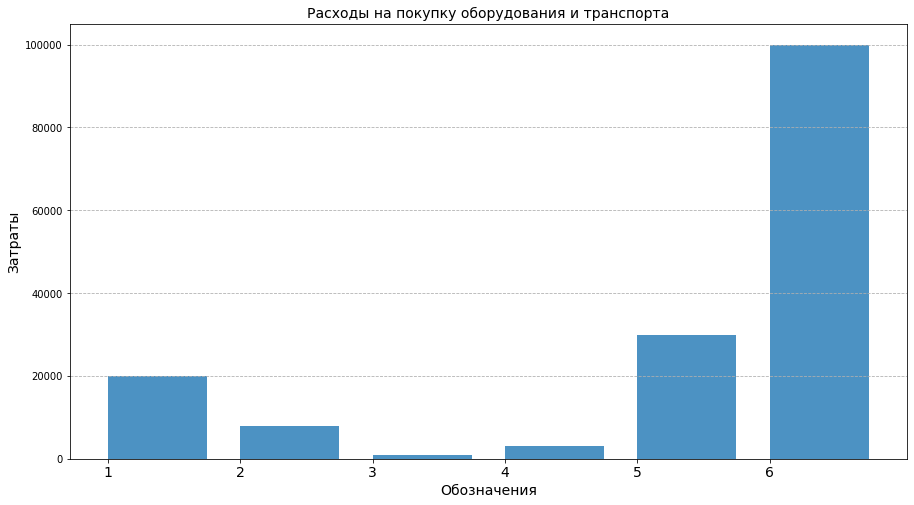

1  -  Стол, стул ; 
2  -  Принтер ; 
3  -  Инструменты для уборки помещения  ; 
4  -  Кулер для персонала ; 
5  -  Кассовый аппарат ; 
6  -  Компьютер ; 


In [ ]:
worksheet = table.worksheet("Основные средства")
rows = worksheet.get_all_values()
#print(rows)
name = list()
price = list()
count = list()
value = list()
i=0
for row in rows:
  if(i>1):
    print (i - 1, row)
    name.append(row[1])
    price.append(float(row[2]))
    count.append(int(row[3]))
    value.append(float(row[2])*int(row[3]))
  i+=1
FixedAssets_Cost = sum(value)
print('Основные средства:', FixedAssets_Cost)

import matplotlib.pyplot as plt
x_float = list()
title = list()
y_float = list()
count = 1
for i in name:
  title.append(i)
  x_float.append(count)
  y_float.append(value[count - 1])
  count += 1
x_pos = list()
for i in range(x_float.__len__()):
    x_pos.append(i)
fig=plt.figure(figsize=(15,8), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.8)
plt.xticks(x_pos, x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Затраты', fontsize=14)
plt.title('Расходы на покупку оборудования и транспорта', fontsize=14)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

for i in range(title.__len__()):
    print(i+1, " - ", title[i], "; ")
    i += 1

In [ ]:
worksheet = table.worksheet("Кредит")
rows = worksheet.get_all_values()
#print(rows)
name = list()
value = list()
i=0
for row in rows:
  if(i>3 and row[0] != ""):
    print (i - 3, row)
    name.append(row[0])
    value.append(float(row[1]))
  i+=1
capital = value[0]
print(name[0], capital)
credit = float(value[1])
print(name[1], credit)
percent = value[2]
print(name[2], percent)
cost_of_credit = credit*percent/100
print('Годовая стоимость кредита составит: ',cost_of_credit)


1 ['Уставной капитал, руб', '55000000']
2 ['Величина кредита, руб', '5500000']
3 ['Годовая процентная ставка, %', '7']
Уставной капитал, руб 55000000.0
Величина кредита, руб 5500000.0
Годовая процентная ставка, % 7.0
Годовая стоимость кредита составит:  385000.0


1 ['Аренда офиса', '150000']
2 ['Коммунальные платежи', '35000']
3 ['Банковское обслуживание', '5000']
4 ['Реклама', '20000']
5 ['Расходники для работы', '10000']
6 ['Обслуживание сайта', '15000']
Текущие расходы в течение года: :  235000.0


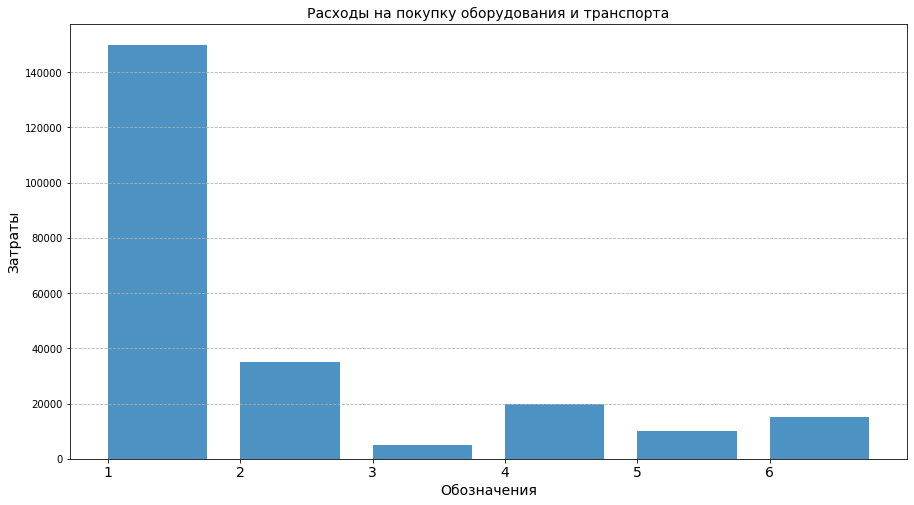

1  -  Аренда офиса ; 
2  -  Коммунальные платежи ; 
3  -  Банковское обслуживание ; 
4  -  Реклама ; 
5  -  Расходники для работы ; 
6  -  Обслуживание сайта ; 


In [ ]:
worksheet = table.worksheet("Расходы")
rows = worksheet.get_all_values()
#print(rows)
name = list()
value = list()
i=0
for row in rows:
  if(i>0):
    print (i - 0, row)
    name.append(row[0])
    value.append(float(row[1]))
  i+=1
current_expensis = sum(value)
print('Текущие расходы в течение года: : ', current_expensis)

import matplotlib.pyplot as plt
x_float = list()
title = list()
y_float = list()
count = 1
for i in name:
  title.append(i)
  x_float.append(count)
  y_float.append(value[count - 1])
  count += 1
x_pos = list()
for i in range(x_float.__len__()):
    x_pos.append(i)
fig=plt.figure(figsize=(15,8), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.8)
plt.xticks(x_pos, x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Затраты', fontsize=14)
plt.title('Расходы на покупку оборудования и транспорта', fontsize=14)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

for i in range(title.__len__()):
    print(i+1, " - ", title[i], "; ")
    i += 1

Планируемые доходы составят: 7165000.0
Затраты на зарплату в том числе страховые взносы  составят : 5334750.0
Стоимость основных средств составит: 161800.0
Годовая стоимость кредита составит:  385000.0
Текущие расходы в течение года:  235000.0
Доходы - Расходы: 1210250.0
Доходы - Расходы(Включая единоразовые расходы на оборудование и транспорт): 1048450.0
Налог  на прибыль составит:  181537.5
Чистая прибыль составит :  1028712.5


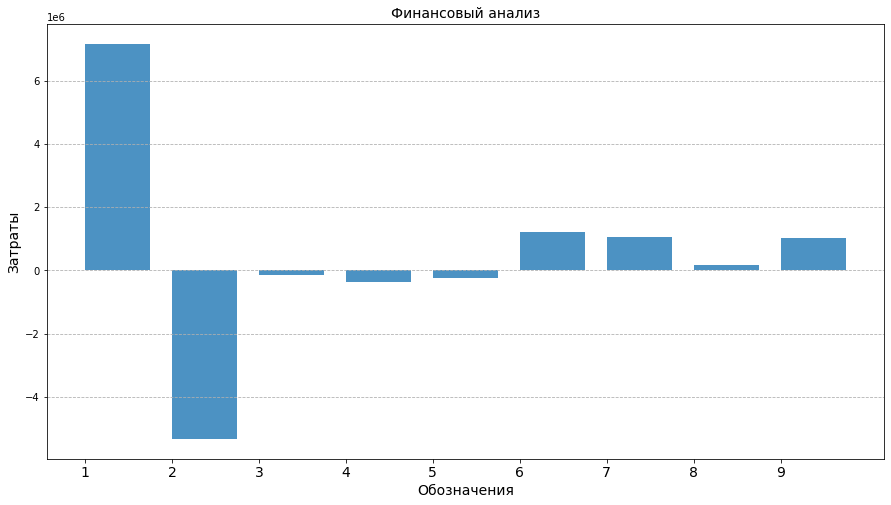

1  -  Планируемые доходы ; 
2  -  Зарплата + страховка ; 
3  -  Единоразовые затраты ; 
4  -  Проценты по кредиту ; 
5  -  Ежегодные расходы ; 
6  -  Доходы - Расходы ; 
7  -  Доходы - Расходы(Включая единоразовые расходы на оборудование и транспорт) ; 
8  -  Размер налога на прибыль ; 
9  -  Чистая прибыль ; 


In [ ]:
print('Планируемые доходы составят:', proceeds)
print('Затраты на зарплату в том числе страховые взносы  составят :', personnel_costs)
print('Стоимость основных средств составит:', FixedAssets_Cost)
print('Годовая стоимость кредита составит: ',cost_of_credit)
print('Текущие расходы в течение года: ',current_expensis)
incom_expenses = proceeds - personnel_costs - cost_of_credit - current_expensis
print('Доходы - Расходы:', incom_expenses)
print('Доходы - Расходы(Включая единоразовые расходы на оборудование и транспорт):', incom_expenses - FixedAssets_Cost)
income_tax = 15 # налог на прибыль, %
value_of_income_tax = income_tax * incom_expenses / 100.
print ('Налог  на прибыль составит: ', value_of_income_tax )
print ('Чистая прибыль составит : ', incom_expenses - value_of_income_tax )

import matplotlib.pyplot as plt
x_float = list()
title = list()
y_float = list()

title = [ "Планируемые доходы", "Зарплата + страховка", "Единоразовые затраты", "Проценты по кредиту", 
         "Ежегодные расходы", "Доходы - Расходы", "Доходы - Расходы(Включая единоразовые расходы на оборудование и транспорт)",
         "Размер налога на прибыль", "Чистая прибыль"]
x_float = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y_float = [proceeds, -1*personnel_costs, -1*FixedAssets_Cost,  -1*cost_of_credit, -1*current_expensis, incom_expenses, (incom_expenses - FixedAssets_Cost),
           value_of_income_tax, (incom_expenses - value_of_income_tax)]

x_pos = list()
for i in range(x_float.__len__()):
    x_pos.append(i)
fig=plt.figure(figsize=(15,8), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.8)
plt.xticks(x_pos, x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Затраты', fontsize=14)
plt.title('Финансовый анализ', fontsize=14)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

for i in range(title.__len__()):
    print(i+1, " - ", title[i], "; ")
    i += 1